# Tutorial GasModels.jl, GasTranSim.jl

## Author:

Sai Krishna Kanth Hari,

Scientist,

T-5 Applied Mathematics and Plasma Physics ,

hskkanth@lanl.gov

Presented by: Sai Krishna K. Hari

LA-UR-25-20295

## Los Alamos National Laboratory Grid Science Winter School 2025

This notebook introduces two packages, GasModels.jl and GasTranSim.jl, used for performing analysis on natural gas pipeline networks. 

## Loading Packages

In [1]:
# ]add GasModels
import Pkg
Pkg.add("GasModels")
Pkg.add("JuMP")
Pkg.add("Ipopt")
Pkg.add("JSON")
Pkg.add("Plots")
using GasModels, JuMP, Ipopt, JSON, Plots
ipopt_solver = JuMP.optimizer_with_attributes(
    Ipopt.Optimizer,
    "print_level" => 0,
    "sb" => "yes",
    "mu_init" => 1e-2,
    "acceptable_tol" => 1.0e-2,
)

   Resolving package versions...
  No Changes to `~/Desktop/GasDemo/Project.toml`
  No Changes to `~/Desktop/GasDemo/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/GasDemo/Project.toml`
  No Changes to `~/Desktop/GasDemo/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/GasDemo/Project.toml`
  No Changes to `~/Desktop/GasDemo/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/GasDemo/Project.toml`
  No Changes to `~/Desktop/GasDemo/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/GasDemo/Project.toml`
  No Changes to `~/Desktop/GasDemo/Manifest.toml`


MathOptInterface.OptimizerWithAttributes(Ipopt.Optimizer, Pair{MathOptInterface.AbstractOptimizerAttribute, Any}[MathOptInterface.RawOptimizerAttribute("print_level") => 0, MathOptInterface.RawOptimizerAttribute("sb") => "yes", MathOptInterface.RawOptimizerAttribute("mu_init") => 0.01, MathOptInterface.RawOptimizerAttribute("acceptable_tol") => 0.01])

# Reading data

In [2]:
data = parse_file("data/case-6.m")

[warn | GasModels]: no case version found in .m file.  The file seems to be missing "mgc.version = ..."
[info | GasModels]: extending matlab format with constant data: economic_weighting
[info | GasModels]: extending matlab format with constant data: base_flow


Dict{String, Any} with 32 entries:
  "gas_specific_gravity"         => 0.6
  "economic_weighting"           => 0.95
  "base_density"                 => 21.718
  "temperature"                  => 288.706
  "source_type"                  => ".m"
  "is_per_unit"                  => 1
  "name"                         => "model6_new_format"
  "base_flux"                    => 8071.8
  "source_version"               => "0.0.0+"
  "multinetwork"                 => false
  "base_volume"                  => 5000
  "gas_molar_mass"               => 0.017376
  "compressor"                   => Dict{String, Any}("1"=>Dict{String, Any}("o…
  "base_length"                  => 5000
  "receipt"                      => Dict{String, Any}("1"=>Dict{String, Any}("i…
  "compressibility_factor"       => 1
  "specific_heat_capacity_ratio" => 1.4
  "delivery"                     => Dict{String, Any}("4"=>Dict{String, Any}("i…
  "base_mass"                    => 1.0859e5
  "base_flow"                    => 807

In [3]:
data["pipe"]["1"]

Dict{String, Any} with 18 entries:
  "num_spatial_discretization_points" => 1
  "to_junction"                       => 2
  "diameter"                          => 0.6
  "length"                            => 10.0
  "is_per_unit"                       => 1
  "status"                            => 1
  "id"                                => 1
  "friction_factor"                   => 0.01
  "is_bidirectional"                  => 1
  "p_max"                             => 2.0
  "fr_junction"                       => 5
  "index"                             => 1
  "pipeline_name"                     => "synthetic6"
  "is_si_units"                       => 0
  "flow_max"                          => 0.0169646
  "flow_min"                          => -0.0169646
  "p_min"                             => 1.0
  "is_english_units"                  => 0

In [4]:
data_gaslib = parse_file("data/GasLib-test.zip")
data_gaslib["pipe"]["1"]

[warn | InfrastructureModels]: running update_data with data that does not include per_unit field, units may be incorrect
[warn | InfrastructureModels]: running update_data with data that does not include per_unit field, units may be incorrect


Dict{String, Any} with 16 entries:
  "friction_factor"  => 0.00109299
  "is_bidirectional" => 1
  "p_max"            => 1.0
  "fr_junction"      => 8
  "to_junction"      => 1
  "diameter"         => 1.0
  "index"            => 1
  "length"           => 0.2
  "is_per_unit"      => 1
  "is_si_units"      => 0
  "status"           => 1
  "flow_min"         => -0.751246
  "flow_max"         => 0.751246
  "id"               => 1
  "p_min"            => 0.0
  "is_english_units" => 0

## Defining and Solving a Problem

Here, we show the procedure to define and solve the Optimal Gas Flow problem

In [5]:
problem_form = WPGasModel
solver = ipopt_solver;

In [6]:
result_ogf = run_ogf(data,problem_form,solver)

Dict{String, Any} with 8 entries:
  "solve_time"         => 1.80599
  "optimizer"          => "Ipopt"
  "termination_status" => LOCALLY_SOLVED
  "dual_status"        => FEASIBLE_POINT
  "primal_status"      => FEASIBLE_POINT
  "objective"          => -167.19
  "solution"           => Dict{String, Any}("base_density"=>21.718, "is_per_uni…
  "objective_lb"       => -Inf

In [7]:
result_ogf["solution"]

Dict{String, Any} with 15 entries:
  "base_density"        => 21.718
  "is_per_unit"         => 1
  "multinetwork"        => false
  "base_volume"         => 5000
  "compressor"          => Dict{String, Any}("1"=>Dict{String, Any}("f"=>0.0075…
  "base_length"         => 5000
  "receipt"             => Dict{String, Any}("1"=>Dict{String, Any}("fg"=>0.007…
  "base_mass"           => 1.0859e5
  "base_flow"           => 8071.8
  "base_time"           => 13.453
  "transfer"            => Dict{String, Any}("4"=>Dict{String, Any}("ft"=>-9.98…
  "junction"            => Dict{String, Any}("4"=>Dict{String, Any}("psqr"=>1.0…
  "base_pressure"       => 3000000
  "pipe"                => Dict{String, Any}("4"=>Dict{String, Any}("f"=>-0.000…
  "multiinfrastructure" => false

In [8]:
result_ogf["solution"]["compressor"]

Dict{String, Any} with 2 entries:
  "1" => Dict{String, Any}("f"=>0.00751739, "rsqr"=>1.0, "r"=>1.0)
  "2" => Dict{String, Any}("f"=>0.00280574, "rsqr"=>1.0, "r"=>1.0)

In [9]:
result_ogf["solution"]["receipt"]["1"]["fg"]*result_ogf["solution"]["base_flow"]
# result_ogf["solution"]["junction"]["2"]["p"]*result_ogf["solution"]["base_pressure"]

60.67887302007934

### LP Relaxation

Here, we show the procedure to run the linear relaxation of the OGF

In [10]:
result_ogf_lp = run_ogf(data,LRWPGasModel,solver)

Dict{String, Any} with 8 entries:
  "solve_time"         => 0.0245399
  "optimizer"          => "Ipopt"
  "termination_status" => LOCALLY_SOLVED
  "dual_status"        => FEASIBLE_POINT
  "primal_status"      => FEASIBLE_POINT
  "objective"          => -219.342
  "solution"           => Dict{String, Any}("base_density"=>21.718, "is_per_uni…
  "objective_lb"       => -Inf

### Optimality gap

In [11]:
nlp_val = result_ogf["objective"]
lp_val = result_ogf_lp["objective"]
percent_gap = 100*(lp_val - nlp_val)/nlp_val

31.19333944296596

### Large flows

In [12]:
result_ogf_lp["solution"]["receipt"]["1"]["fg"]*result_ogf["solution"]["base_flow"]
# result_ogf_lp["solution"]["junction"]["2"]["p"]*result_ogf_lp["solution"]["base_pressure"]

86.21825092738716

In [13]:
result_ls = run_ls(data,problem_form,solver)

Dict{String, Any} with 8 entries:
  "solve_time"         => 0.024061
  "optimizer"          => "Ipopt"
  "termination_status" => ALMOST_LOCALLY_SOLVED
  "dual_status"        => NEARLY_FEASIBLE_POINT
  "primal_status"      => NEARLY_FEASIBLE_POINT
  "objective"          => 0.0
  "solution"           => Dict{String, Any}("base_density"=>21.718, "is_per_uni…
  "objective_lb"       => -Inf

# Transient OGF

Here, we provide a procedure to solve the transient optimal gas flow problem

In [14]:
transient_data = parse_files("data/case-6.m","data/time-series-case-6a.csv",spatial_discretization = 1e4)

[warn | GasModels]: no case version found in .m file.  The file seems to be missing "mgc.version = ..."
[info | GasModels]: extending matlab format with constant data: economic_weighting
[info | GasModels]: extending matlab format with constant data: base_flow


Dict{String, Any} with 27 entries:
  "gas_specific_gravity"         => 0.6
  "economic_weighting"           => 0.95
  "base_density"                 => 21.718
  "temperature"                  => 288.706
  "base_flux"                    => 8071.8
  "is_per_unit"                  => 1
  "name"                         => "31 replicates of model6_new_format"
  "num_time_points"              => 31
  "num_physical_time_points"     => 25
  "multinetwork"                 => true
  "base_volume"                  => 5000
  "gas_molar_mass"               => 0.017376
  "base_length"                  => 5000
  "compressibility_factor"       => 1
  "specific_heat_capacity_ratio" => 1.4
  "base_mass"                    => 1.0859e5
  "base_flow"                    => 8071.8
  "base_time"                    => 13.453
  "units"                        => "si"
  "base_pressure"                => 3000000
  "is_si_units"                  => 0
  "time_step"                    => 267.598
  "sound_speed"      

In [15]:
transient_data["nw"]["2"]

Dict{String, Any} with 14 entries:
  "time_point"        => 267.598
  "source_type"       => ".m"
  "name"              => "model6_new_format"
  "source_version"    => "0.0.0+"
  "original_pipe"     => Dict{String, Any}("4"=>Dict{String, Any}("fr_pipe"=>40…
  "multinetwork"      => false
  "compressor"        => Dict{String, Any}("1"=>Dict{String, Any}("outlet_p_min…
  "receipt"           => Dict{String, Any}("1"=>Dict{String, Any}("injection_no…
  "delivery"          => Dict{String, Any}("4"=>Dict{String, Any}("is_dispatcha…
  "original_junction" => Dict{String, Any}("4"=>Dict{String, Any}("lat"=>0.8897…
  "transfer"          => Dict{String, Any}("4"=>Dict{String, Any}("is_dispatcha…
  "junction"          => Dict{String, Any}("1"=>Dict{String, Any}("lat"=>-0.655…
  "pipe"              => Dict{String, Any}("2014"=>Dict{String, Any}("to_juncti…
  "sources"           => Dict{String, Any}[Dict("name"=>"test", "agreement_year…

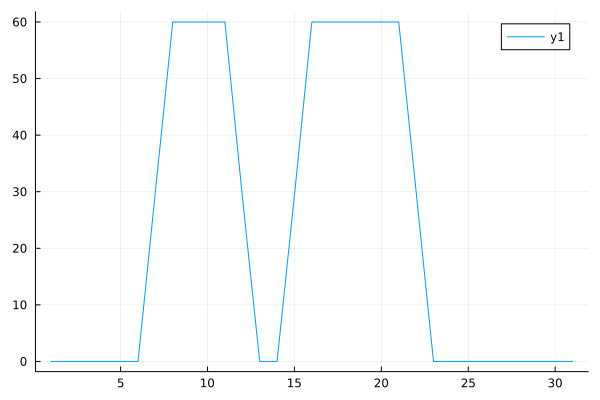

In [16]:
n = transient_data["num_time_points"]
withdrawal_data_array = zeros(n)
tp = "4"
for t in 1:n
    withdrawal_data_array[t] = transient_data["nw"][string(t)]["transfer"][tp]["withdrawal_max"]*transient_data["base_flow"]
end
plot(withdrawal_data_array)


In [17]:
transient_result = run_transient_ogf(transient_data,problem_form,solver)

Dict{String, Any} with 8 entries:
  "solve_time"         => 18.1112
  "optimizer"          => "Ipopt"
  "termination_status" => LOCALLY_SOLVED
  "dual_status"        => FEASIBLE_POINT
  "primal_status"      => FEASIBLE_POINT
  "objective"          => -5017.8
  "solution"           => Dict{String, Any}("base_density"=>21.718, "is_per_uni…
  "objective_lb"       => -Inf

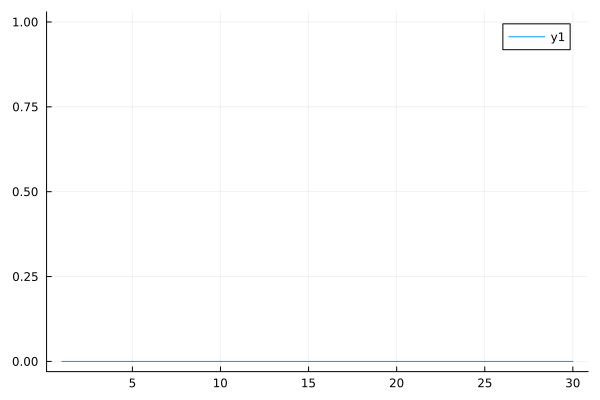

In [18]:
n = length(transient_result["solution"]["nw"])
tp = "4"
withdrawal_array = zeros(n-1)
for t in 1:n-1
   withdrawal_array[t] =  transient_result["solution"]["nw"][string(t)]["transfer"][tp]["withdrawal"]*transient_result["solution"]["base_flow"]
end
plot(round.(withdrawal_array,digits=2))

# Transient Simulation

Here, we introduce the GasTranSim package and demonstrate how to use it to run simulations of natural gas flow dynamics in pipeline networks

## Installing and importing the package

In [19]:
Pkg.add("GasTranSim") #(Installing package)
using GasTranSim #(Running package)

   Resolving package versions...
  No Changes to `~/Desktop/GasDemo/Project.toml`
  No Changes to `~/Desktop/GasDemo/Manifest.toml`


## Reading Data

The minimal function call implicitly looks for all input files in the path folder. It assumes the equation of the state for the natural gas to be that given by the ideal gas equation, and that the case_name is an empty string. Thus it looks for input files params.json, network.json, bc.json, ic.json.

However, suppose one wanted to use the same network, parameters and initial conditions with different boundary conditions in say the file bc_new_case.json, and with the CNGA equation of state.

In [20]:
folder = "data/1-pipe-fast-transients/"

#initialize and run simulator
ts = initialize_simulator(folder);

# equivalent to the call
# ts = initialize_simulator(folder; eos = :ideal, case_name="", case_types=[:params, :network, :bc, :ic])

## Running the Simulator

In [21]:
run_simulator!(ts)
@info "run complete"

[ Main | Info ] : run complete


## Saving Output

At the end of the simulation, there are two types of output we are interested in.

1. A record of pressures/density at every node (junction) of the network, and the inflows/outflows into each pipe of the network at a frequency (Output dt) specified in the input file params.json.
2. The state of the network at the end of the simulation, i.e., the values of the pressure/density and the mass flux along the pipes throughout the network are recorded following the spatial resolution (Output dx) set in the input file params.json. This information is stored in the same format as ic.json so that a new simulation can use the final state as the new initial condition and move forward in time.


In [22]:
# save output
output_json = "transim_output/"
write_output(ts; output_path = output_json,
	output_file = "output_time_history.json", final_state_file = "ic_restart.json")
transim_result = GasTranSim.parse_json(output_json * "output_time_history.json")

# print result
# transim_result = JSON.parsefile("transim_output/output_steady_delete.json")

Dict{String, Any} with 5 entries:
  "nodes"       => Dict{String, Any}("1"=>Dict{String, Any}("pressure"=>Any[6.5…
  "time_points" => Any[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0  …  359…
  "time_step"   => 1.0
  "pipes"       => Dict{String, Any}("1"=>Dict{String, Any}("in_pressure"=>Any[…
  "compressors" => Dict{String, Any}()

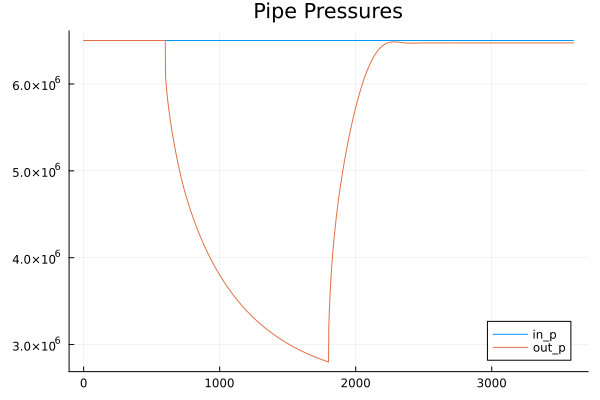

In [23]:
in_p = round.(transim_result["pipes"]["1"]["in_pressure"],digits=2)
out_p = round.(transim_result["pipes"]["1"]["out_pressure"],digits=2)
plot([in_p,out_p],title="Pipe Pressures", label=["in_p" "out_p"])

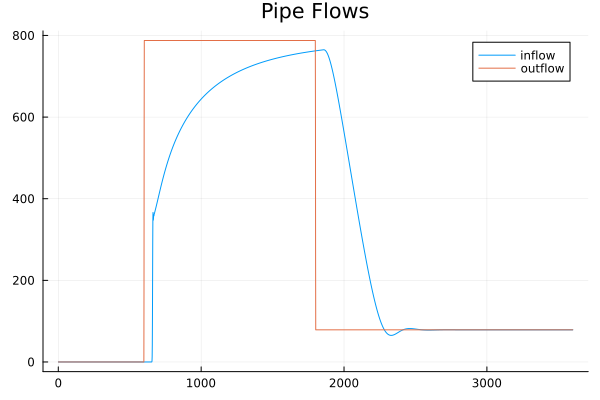

In [24]:
inflow = round.(transim_result["pipes"]["1"]["in_flow"],digits=2)
outflow = round.(transim_result["pipes"]["1"]["out_flow"],digits=2)
plot([inflow,outflow],title="Pipe Flows", label=["inflow" "outflow"])

## Changing EOS and Boundary Conditions
Simple CNGA 𝑝⋅(𝑏1+𝑏2𝑝)=𝜌𝑅𝑔𝑇

In [25]:
folder = "data/1-pipe-fast-transients/"
output_json = "transim_output/"
ts = initialize_simulator(folder; eos = :simple_cnga) #, case_name="new_case", case_types=[:bc,:ic])
run_simulator!(ts)

[ Main | Info ] : run complete


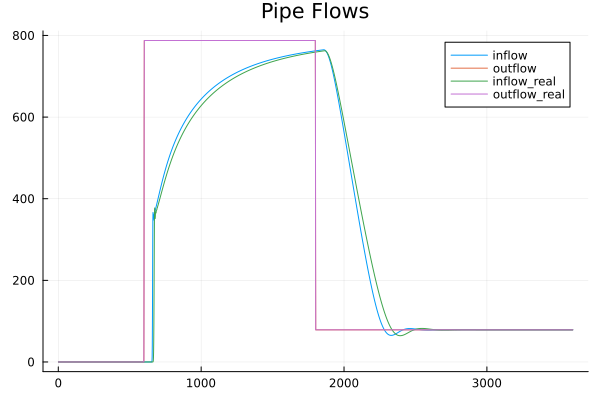

In [26]:
# save output
write_output(ts; output_path = output_json,
	output_file = "output_time_history_cnga.json", final_state_file = "ic_restart_cnga.json")
sol = GasTranSim.parse_json(output_json * "output_time_history_cnga.json")
@info "run complete"

# print result
transim_result_real = JSON.parsefile("transim_output/output_time_history_cnga.json")

inflow_real = round.(transim_result_real["pipes"]["1"]["in_flow"],digits=2)
outflow_real = round.(transim_result_real["pipes"]["1"]["out_flow"],digits=2)
plot([inflow,outflow,inflow_real, outflow_real],title="Pipe Flows", label=["inflow" "outflow" "inflow_real" "outflow_real"])

## 8-node network

In [27]:
folder = "data/8-node/"

#initialize and run simulator
ts = initialize_simulator(folder)
run_simulator!(ts)

In [28]:
# save output
write_output(ts; output_path = output_json,
	output_file = "output_steady_delete.json", final_state_file = "ic_delete.json")
sol = GasTranSim.parse_json(output_json * "output_steady_delete.json")
@info "run complete"

# print result
transim_result_8 = JSON.parsefile("transim_output/output_steady_delete.json")

[ Main | Info ] : run complete


Dict{String, Any} with 5 entries:
  "nodes"       => Dict{String, Any}("8"=>Dict{String, Any}("pressure"=>Any[4.2…
  "time_points" => Any[0.0, 1000.0, 2000.0, 3000.0, 4000.0, 5000.0, 6000.0, 700…
  "time_step"   => 20.0
  "pipes"       => Dict{String, Any}("4"=>Dict{String, Any}("in_pressure"=>Any[…
  "compressors" => Dict{String, Any}("1"=>Dict{String, Any}("suction_pressure"=…

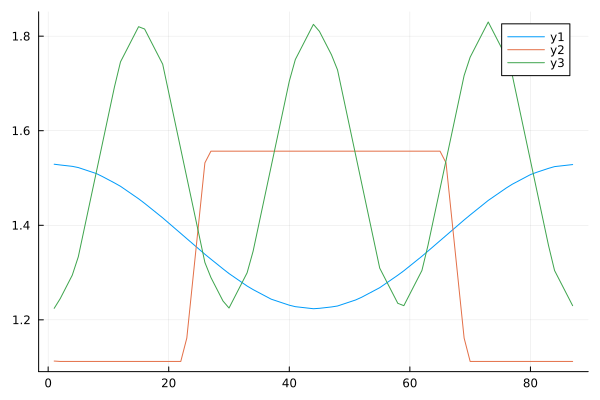

In [29]:
alpha_1 = transim_result_8["compressors"]["1"]["compression_ratio"]
alpha_2 = transim_result_8["compressors"]["2"]["compression_ratio"]
alpha_3 = transim_result_8["compressors"]["3"]["compression_ratio"]
plot([alpha_1,alpha_2,alpha_3])